<a href="https://colab.research.google.com/github/ckj18/ToBigs_workspace/blob/main/tobigs19_Clustering_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 19기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings(action='ignore') 

df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


## 1. 결측치 처리

In [ ]:
# 결측치 비율 확인
print(df.isnull().sum() / len(df))

Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


## 2. EDA

In [ ]:
# 변수들 간 상관관계 파악
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


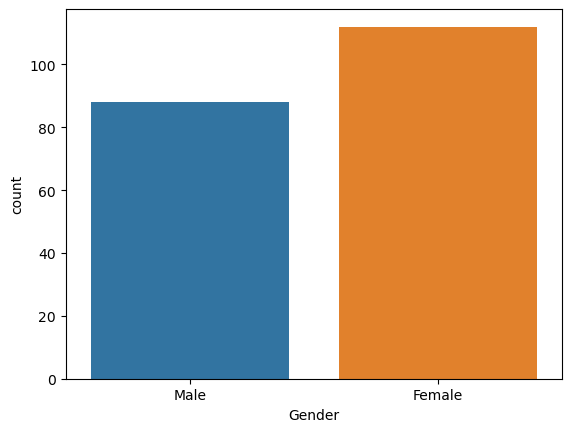

In [ ]:
# Gender별 데이터 개수 확인
sns.countplot(x='Gender', data=df)
plt.show()

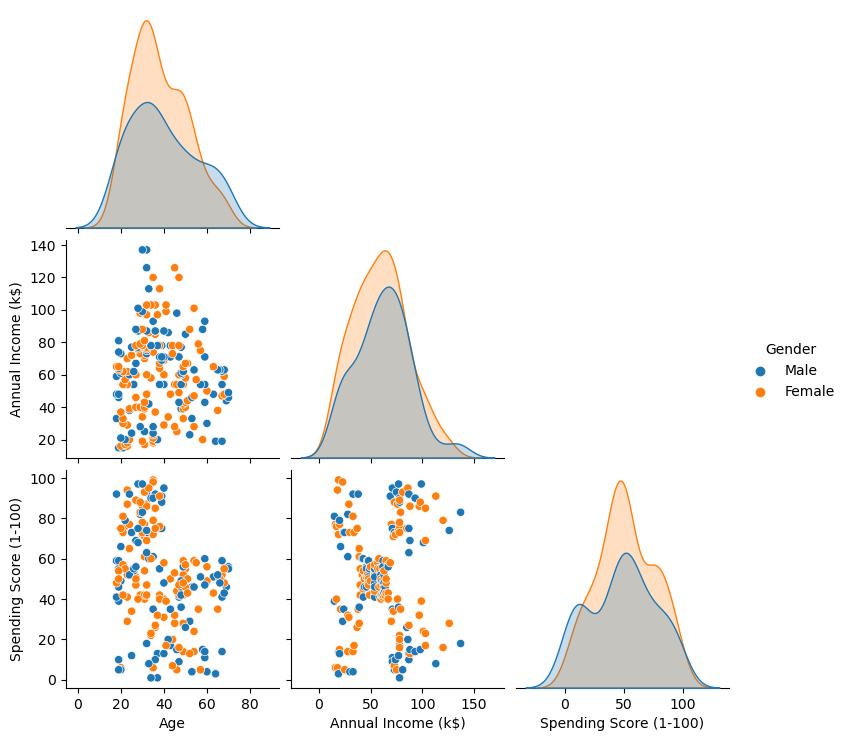

In [ ]:
# Gender에 따른 시각화
df_sample = df[list(df.columns)]
sns.pairplot(data=df_sample, hue='Gender', corner=True)
plt.show()

# 소비 점수에 따른 연간 소득의 분포가 특정한 군집을 형성
# Age; 2-30대 여성 비율이 남성보다 높으며, 고령일수록 남성 비율이 높아짐
# Annual Income: 여성 소득이 남성 소득보다 전체적으로 높음
# Spending score: 소비 점수는 여성이 남성보다 전반적으로 높음

In [ ]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
scaler = MinMaxScaler()
columns = [column for column in df.columns if df[column].dtypes != 'O']

for col in columns:
        df.loc[:, col] = scaler.fit_transform(np.array(df[col]).reshape(-1, 1))

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,0.019231,0.000000,0.387755
2,Male,0.057692,0.000000,0.816327
3,Female,0.038462,0.008197,0.051020
4,Female,0.096154,0.008197,0.775510
5,Female,0.250000,0.016393,0.397959


## 3. 클러스터링

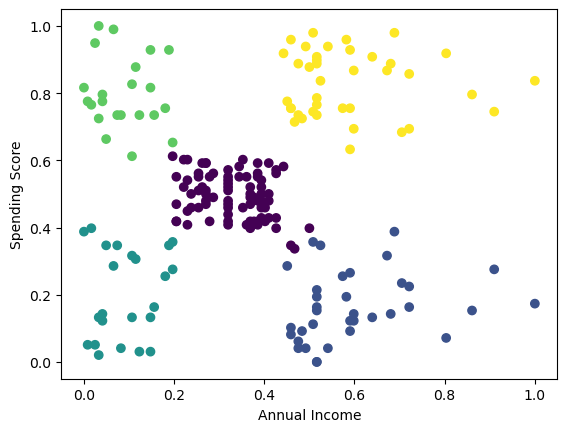

In [ ]:
from sklearn.cluster import KMeans
# 분석에 사용될 데이터 추출
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# pairplot의 군집화가 보이는 연 소득별 소비점수를 기준으로 k=5로 지정 
kmeans = KMeans(n_clusters = 5).fit(data)
data['K5'] = kmeans.labels_ 

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = data['K5'])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()
# 군집화가 잘 진행되었음을 확인 가능

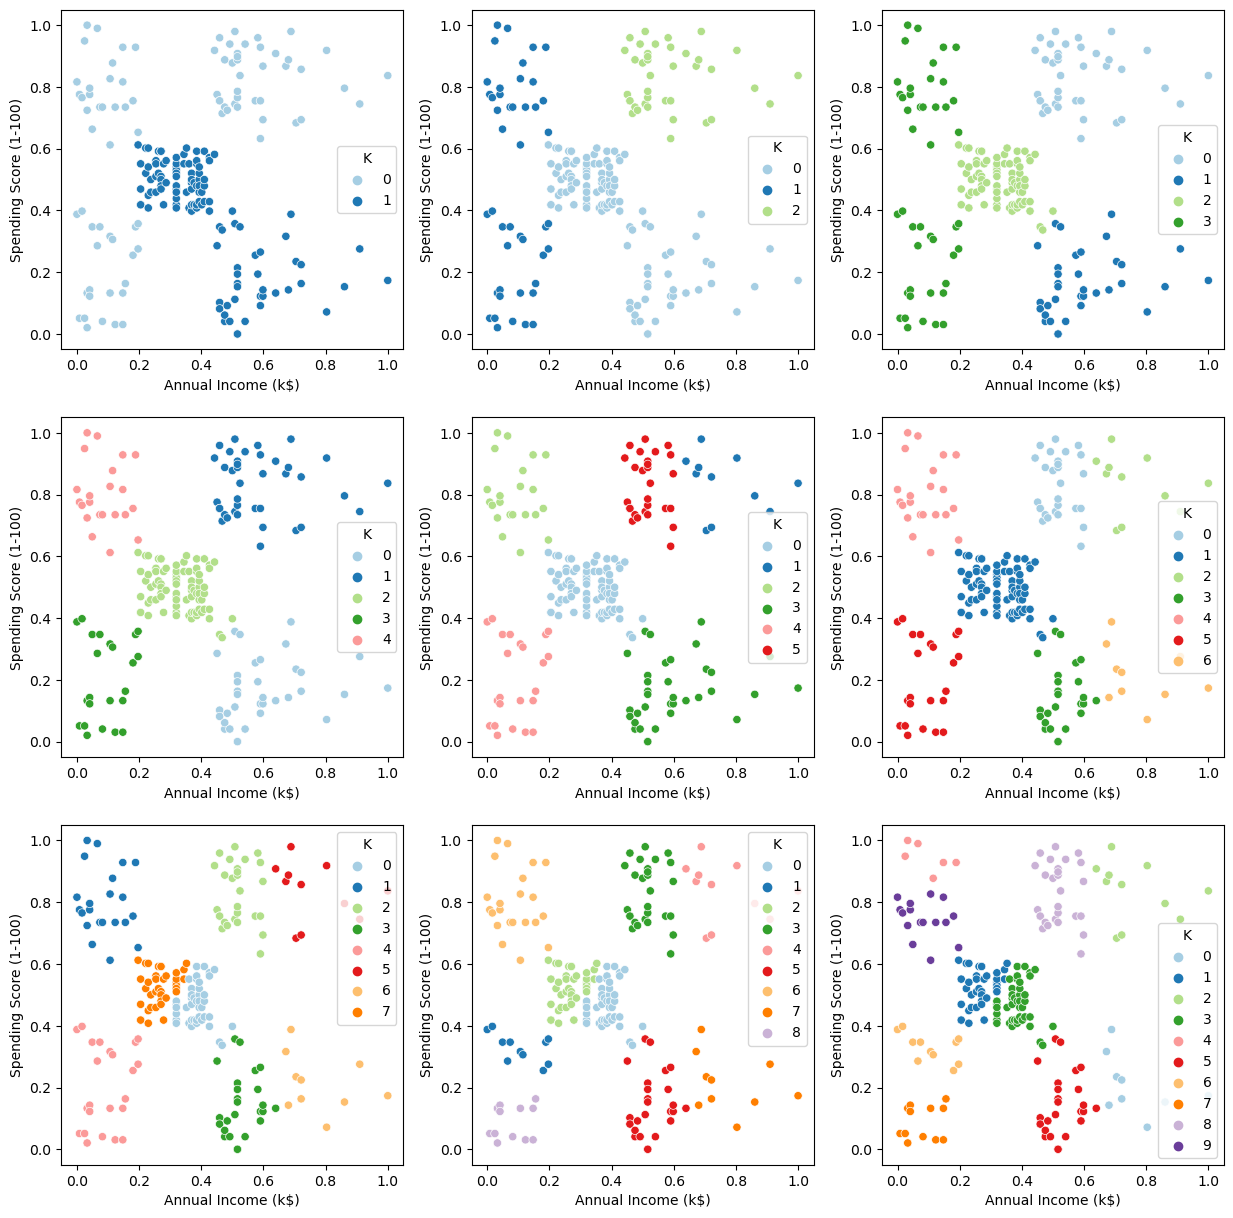

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
# K값 변화에 따른 군집 변화
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

# k: 2~10의 값 
k_value = range(2, 11)
k_silhouette_score = {}

for k in k_value:
    kmeans = KMeans(n_clusters = k).fit(data)
    data['K'] = kmeans.labels_ 
    
    k_group_silhouette[k] = silhouette_samples(data, data['K'])
    k_silhouette_score[k] = silhouette_score(data, data['K'])
    
    if k < 5:
        sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, ax=ax[0,k-2], hue='K', palette='Paired')
    elif k < 8:
        sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, ax=ax[1,k-5], hue='K', palette='Paired')
    else:
        sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, ax=ax[2,k-8], hue='K', palette='Paired')
    
plt.show()

In [ ]:
# k_silhouette_mean_score 확인 & 전체적으로 실루엣 계수가 높음, K가 5 이상부터는 군집화가 잘 진행
for _, k in enumerate(k_silhouette_score):
    print("K={}: Score={:.2f}".format(k, k_silhouette_score[k]))

K=2: Score=0.73
K=3: Score=0.75
K=4: Score=0.87
K=5: Score=0.92
K=6: Score=0.92
K=7: Score=0.92
K=8: Score=0.92
K=9: Score=0.92
K=10: Score=0.92
